# Text Analysis (cont'd)
The aim of the notebook is to begin with quantitative analysis of text data. We select a Czech text, split it into tokens, perform frequency analysis, and observe the nature of the data.

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

[nltk_data] Downloading package punkt to /home/zuzana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
text = None
with open('../01-DH/maj.txt') as f:  # modify the path if needed
    text = f.read()

In [3]:
import requests
import json

In [4]:
data = {"call": "tagger", 
        "lang": "cs",
        "output": "json",
        "text": text.replace(';', ',')
       }
uri = "https://nlp.fi.muni.cz/languageservices/service.py"
r = requests.post(uri, params=data)
r

<Response [200]>

In [5]:
data = r.json()
data

{'vertical': [['<s>'],
  ['Byl', 'být', 'k5eAaImAgInS'],
  ['pozdní', 'pozdní', 'k2eAgInSc1d1'],
  ['večer', 'večer', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['první', 'první', 'k4xOgInSc4'],
  ['máj', 'máj', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['večerní', 'večerní', 'k2eAgInSc4d1'],
  ['máj', 'máj', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['byl', 'být', 'k5eAaImAgInS'],
  ['lásky', 'láska', 'k1gFnSc2'],
  ['čas', 'čas', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['Hrdliččin', 'hrdliččin', 'k2eAgInSc1d1'],
  ['zval', 'zvát', 'k5eAaImAgInS'],
  ['ku', 'k', 'k7c3'],
  ['lásce', 'láska', 'k1gFnSc3'],
  ['hlas', 'hlas', 'k1gInSc1'],
  ['<g/>'],
  [',', ',', 'kIx,'],
  ['kde', 'kde', 'k6eAd1'],
  ['borový', 'borový', 'k2eAgMnSc1d1'],
  ['zaváněl', 'zavánět', 'k5eAaImAgInS'],
  ['háj', 'háj', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['O', 'o', 'k7c6'],
  ['lásce', 'láska', 'k1gFnSc6'],
  ['šeptal', 'šeptat', 'k5eAaImAgInS

In [6]:
tokens = [token for token in data['vertical'] if len(token)==3]
df = pd.DataFrame.from_dict({"word": [word for word, lemma, tag in tokens], 
                              "lemma": [lemma for word, lemma, tag in tokens], 
                              "tag": [tag for word, lemma, tag in tokens]
                               })
df

word      lemma           tag
0           Byl        být  k5eAaImAgInS
1        pozdní     pozdní  k2eAgInSc1d1
2         večer      večer      k1gInSc1
3             –          –            k?
4         první      první    k4xOgInSc4
5           máj        máj      k1gInSc1
6             –          –            k?
7       večerní    večerní  k2eAgInSc4d1
8           máj        máj      k1gInSc1
9             –          –            k?
10          byl        být  k5eAaImAgInS
11        lásky      láska      k1gFnSc2
12          čas        čas      k1gInSc1
13            .          .          kIx.
14    Hrdliččin  hrdliččin  k2eAgInSc1d1
15         zval       zvát  k5eAaImAgInS
16           ku          k          k7c3
17        lásce      láska      k1gFnSc3
18         hlas       hlas      k1gInSc1
19            ,          ,          kIx,
20          kde        kde        k6eAd1
21       borový     borový  k2eAgMnSc1d1
22      zaváněl    zavánět  k5eAaImAgInS
23          háj        háj      k1gInSc1
24            .          .          kIx.
25            O          o          k7c6
26        lásce      láska      k1gFnSc6
27       šeptal     šeptat  k5eAaImAgInS
28        tichý      tichý  k2eAgInSc1d1
29         mech       mech      k1gInSc1
...         ...        ...           ...
2217  Strážného    strážný      k1gMnSc4
2218    vzbudil    vzbudit  k5eAaPmAgInS
2219    strašný    strašný  k2eAgInSc1d1
2220      hřmot      hřmot      k1gInSc1
2221          ,          ,          kIx,
2222       jejž       jenž    k3xRgInSc4
2223     řetězů      řetěz      k1gInPc2
2224       činí      činit  k5eAaImIp3nS
2225     padání     padání      k1gNnSc1
2226          ,          ,          kIx,
2227         se         se      k3xPyFc4
2228    světlem     světlo      k1gNnSc7
2229   vstoupil   vstoupit  k5eAaPmAgInS
2230          .          .          kIx.
2231          –          –            k?
2232      Lehký      lehký  k2eAgInSc1d1
2233       chod       chod      k1gInSc1
2234  nevzbudil    vzbudit  k5eNaPmAgInS
2235      vězně      vězeň      k1gMnPc4
2236          z          z          k7c2
2237  strašných    strašný  k2eAgNnPc2d1
2238      zdání      zdání      k1gNnPc2
2239          .          .          kIx.
2240         Od         od          k7c2
2241     sloupu      sloup      k1gInSc2
2242          k          k          k7c3
2243     sloupu      sloup      k1gInSc3
2244      lampy      lampa      k1gFnSc2
2245       svit       svit  k2eAgInSc1d1
2246      dlouh      dlouh      k1gInSc1

[2247 rows x 3 columns]

In [7]:
pos = [tag[0:2] for tag in df["tag"]]
df["pos"] = pos
df

word      lemma           tag pos
0           Byl        být  k5eAaImAgInS  k5
1        pozdní     pozdní  k2eAgInSc1d1  k2
2         večer      večer      k1gInSc1  k1
3             –          –            k?  k?
4         první      první    k4xOgInSc4  k4
5           máj        máj      k1gInSc1  k1
6             –          –            k?  k?
7       večerní    večerní  k2eAgInSc4d1  k2
8           máj        máj      k1gInSc1  k1
9             –          –            k?  k?
10          byl        být  k5eAaImAgInS  k5
11        lásky      láska      k1gFnSc2  k1
12          čas        čas      k1gInSc1  k1
13            .          .          kIx.  kI
14    Hrdliččin  hrdliččin  k2eAgInSc1d1  k2
15         zval       zvát  k5eAaImAgInS  k5
16           ku          k          k7c3  k7
17        lásce      láska      k1gFnSc3  k1
18         hlas       hlas      k1gInSc1  k1
19            ,          ,          kIx,  kI
20          kde        kde        k6eAd1  k6
21       borový     borový  k2eAgMnSc1d1  k2
22      zaváněl    zavánět  k5eAaImAgInS  k5
23          háj        háj      k1gInSc1  k1
24            .          .          kIx.  kI
25            O          o          k7c6  k7
26        lásce      láska      k1gFnSc6  k1
27       šeptal     šeptat  k5eAaImAgInS  k5
28        tichý      tichý  k2eAgInSc1d1  k2
29         mech       mech      k1gInSc1  k1
...         ...        ...           ...  ..
2217  Strážného    strážný      k1gMnSc4  k1
2218    vzbudil    vzbudit  k5eAaPmAgInS  k5
2219    strašný    strašný  k2eAgInSc1d1  k2
2220      hřmot      hřmot      k1gInSc1  k1
2221          ,          ,          kIx,  kI
2222       jejž       jenž    k3xRgInSc4  k3
2223     řetězů      řetěz      k1gInPc2  k1
2224       činí      činit  k5eAaImIp3nS  k5
2225     padání     padání      k1gNnSc1  k1
2226          ,          ,          kIx,  kI
2227         se         se      k3xPyFc4  k3
2228    světlem     světlo      k1gNnSc7  k1
2229   vstoupil   vstoupit  k5eAaPmAgInS  k5
2230          .          .          kIx.  kI
2231          –          –            k?  k?
2232      Lehký      lehký  k2eAgInSc1d1  k2
2233       chod       chod      k1gInSc1  k1
2234  nevzbudil    vzbudit  k5eNaPmAgInS  k5
2235      vězně      vězeň      k1gMnPc4  k1
2236          z          z          k7c2  k7
2237  strašných    strašný  k2eAgNnPc2d1  k2
2238      zdání      zdání      k1gNnPc2  k1
2239          .          .          kIx.  kI
2240         Od         od          k7c2  k7
2241     sloupu      sloup      k1gInSc2  k1
2242          k          k          k7c3  k7
2243     sloupu      sloup      k1gInSc3  k1
2244      lampy      lampa      k1gFnSc2  k1
2245       svit       svit  k2eAgInSc1d1  k2
2246      dlouh      dlouh      k1gInSc1  k1

[2247 rows x 4 columns]

In [31]:
nouns = df[df["pos"]=="k1"]
verbs = df[df["pos"]=="k5"]
cn = nouns.groupby(by="lemma").count()
noun_lemmata = pd.DataFrame({"count":cn["word"]})
vn = verbs.groupby(by="lemma").count()
verb_lemmata = pd.DataFrame({"count":vn["word"]})

noun_lemmata.sort_values("count", ascending=False)

count
lemma          
noc          17
vězeň        14
láska        13
čas          13
hora         12
den          11
myšlenka     11
hlas         11
voda         10
jezero        9
tvář          8
stín          8
sen           8
hvězda        7
ticho         7
konec         7
klín          7
svět          6
zrak          6
kolo          6
jiskra        6
Jarmila       6
hrůza         5
vlna          5
les           5
vina          5
měsíc         5
otec          5
sloup         5
dívka         5
...         ...
pásek         1
péro          1
rameno        1
rouška        1
růž           1
růžina        1
sbor          1
pata          1
paměť         1
padání        1
místo         1
mal           1
malus         1
mech          1
milenec       1
milost        1
mladost       1
mrákota       1
msta          1
nebesa        1
Kapek         1
nejvejš       1
nohoum        1
níže          1
objetí        1
obloha        1
obraz         1
okénko        1
oud           1
žíla          1

[253 rows x 1 columns]

In [30]:
verb_lemmata.sort_values("count", ascending=False)

count
lemma            
být            25
hynout          6
mít             5
znít            5
umírat          5
jít             4
hrát            4
vinout          4
kolit           4
změnit          3
vědět           3
vstát           3
sklesnout       3
splynout        3
zvát            3
opírat          2
zdát            2
zdvíhat         2
kráčet          2
míhat           2
padat           2
zavraždit       2
ležet           2
odpravit        2
lkánět          2
rozestírat      2
zajít           2
přikrývat       2
vidět           2
nastávat        2
...           ...
smrtit          1
roznítit        1
spěchat         1
spět            1
stavit          1
stopit          1
stát            1
stínit          1
střídat         1
růst            1
rozlít          1
osvítit         1
prolést         1
plynout         1
podávat         1
pohrávat        1
pomstit         1
potopit         1
poznat          1
pravit          1
proniknout      1
rozlíhat        1
pronést         1
prosvítat       1
psát            1
pět             1
přebývat        1
přimrazit       1
rozložit        1
skvít           1

[191 rows x 1 columns]

In [46]:
passive = df[df["tag"].str.contains("mN")]
passive

word      lemma                        tag pos
625      skryta      skrýt               k5eAaPmNgFnS  k5
702      stopen     stopit  k5eAaPmNgInS,k5eAaImNgInS  k5
712        vryt       vrýt               k5eAaPmNgInS  k5
765         dán        dát               k5eAaPmNgInS  k5
1126   odpraven   odpravit               k5eAaPmNgMnS  k5
1166  přimrazen  přimrazit               k5eAaPmNgMnS  k5
1258     vyhnán     vyhnat               k5eAaPmNgMnS  k5
1269       zván       zvát               k5eAaImNgMnS  k5
1313        dán        dát               k5eAaPmNgInS  k5
1319   odpraven   odpravit               k5eAaPmNgMnS  k5
1434    vyváben    vyvábit               k5eAaPmNgMnS  k5
1960   rozložen   rozložit               k5eAaPmNgInS  k5
2061       svit       svít               k5eAaPmNgInS  k5
2179     uveden      uvést               k5eAaPmNgMnS  k5

(array([1., 0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 2., 1., 3., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   0.  ,   89.88,  179.76,  269.64,  359.52,  449.4 ,  539.28,
         629.16,  719.04,  808.92,  898.8 ,  988.68, 1078.56, 1168.44,
        1258.32, 1348.2 , 1438.08, 1527.96, 1617.84, 1707.72, 1797.6 ,
        1887.48, 1977.36, 2067.24, 2157.12, 2247.  , 2336.88, 2426.76,
        2516.64, 2606.52, 2696.4 , 2786.28, 2876.16, 2966.04, 3055.92,
        3145.8 , 3235.68, 3325.56, 3415.44, 3505.32, 3595.2 , 3685.08,
        3774.96, 3864.84, 3954.72, 4044.6 , 4134.48, 4224.36, 4314.24,
        4404.12, 4494.  , 4583.88, 4673.76, 4763.64, 

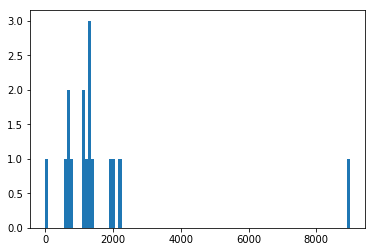

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.append(passive.index.values, [0, df.size]), bins=100)

In [59]:
df.size

8988